<a href="https://colab.research.google.com/github/john-hafner/PHY451-GammaRay/blob/main/Gamma_Ray_Spectroscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

In [15]:
data_url = 'https://raw.githubusercontent.com/john-hafner/PHY451-GammaRay/main/data/spectrum_jan31.csv'

voltage_url = 'https://raw.githubusercontent.com/john-hafner/PHY451-GammaRay/main/data/channel_vs_voltage.csv'
df = pd.read_csv(voltage_url).drop(columns=['Fine Gain', 'Course Gain'])
df

,Voltage,Channel,FWHM
0,700,190,14
1,750,283,21
2,800,414,29
3,850,580,39
4,900,803,57


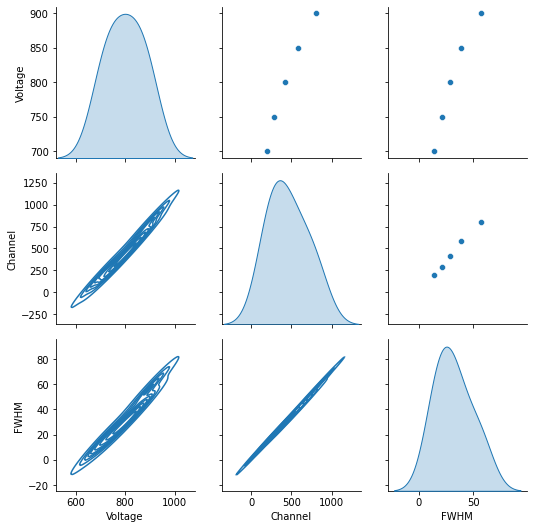

In [11]:
#spec_df = df.drop(columns=['peak', 'Detector', 'Voltage', 'Course Gain', 'Fine Gain', 'Notes'])
g = sns.PairGrid(data=df, diag_sharey=False)
#sns.pairplot(spec_df)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, fill=True)
g.map_lower(sns.kdeplot)


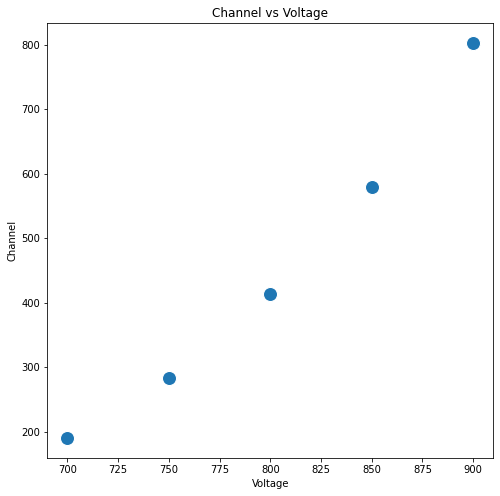

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Voltage', y='Channel', s=200)
plt.title('Channel vs Voltage')
plt.show()

In [51]:
# Create a linear regression model
model = linear_model.LinearRegression()
# Get the x and y data in a numpy array (column vector)
x = np.array(df['Voltage']).reshape(-1,1)
y = np.array(df['Channel']).reshape(-1,1)

model.fit(x, y)

# Evalulate the slope & intercept, with r2_score
print('slope: ', round(float(model.coef_), 3))
print('intercept:', round(float(model.intercept_), 3))
print('r2_score: ', round(model.score(x, y), 3))

# Make the prediction, using the same x since we're not splitting data for training, just
# trying to get the actual line.
y_hat = model.predict(x)

slope:  3.046
intercept: -1982.8
r2_score:  0.974


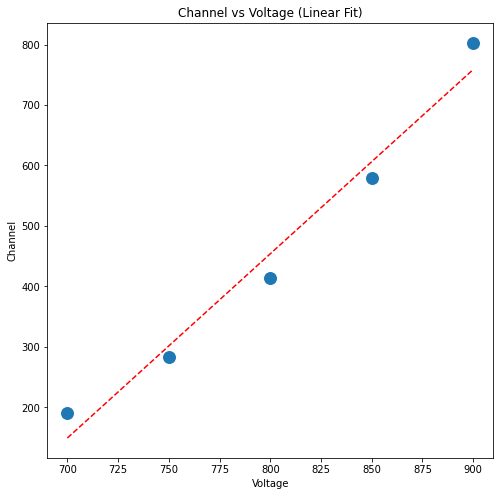

In [48]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Voltage', y='Channel', s=200)
plt.plot(x, y_hat, color='red', linestyle='--')
plt.title('Channel vs Voltage (Linear Fit)')
plt.show()

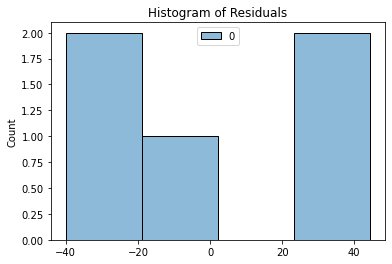

In [56]:
resid = y - y_hat
plt.title('Histogram of Residuals')
sns.histplot(resid)
plt.show()

### Not enough data
With more data we could do a better look at the residuals, hopefully their histogram forms what would look like an obvious gaussian.  But we might not be able to gather enough data without increasing the granularity of the measurements.  So ultimately we'll look at other approaches to evaluate the model's accuracy.

## Polynomial Fit
The data does appear a bit non-linear, so maybe a polynomial could be a better fit. In fact we are told it should look like $\mu = V^x$, and to calculate $x$.  Where $\mu$ is the channel number.  So this is not quite the right fit, as I'll be doing a degree 2 polynomial, but it is another approach and we can see how it works out.

In [95]:
from scipy.optimize import curve_fit

def model_func(v, x, c):
  '''The type of function we want to fit'''
  return v**x + c

v = df['Voltage']
u = df['Channel']

popt, pcov = curve_fit(model_func, v, y)

popt

array([ 1.14646424e+00, -1.67695428e+03])

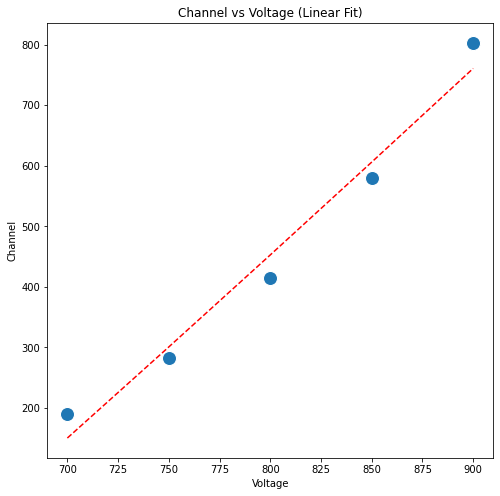

In [96]:
y_hat = v**popt[0] + popt[1]

plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Voltage', y='Channel', s=200)

plt.plot(x, y_hat, color='red', linestyle='--')
plt.title('Channel vs Voltage (Linear Fit)')
plt.show()

In [94]:
print('r2_score:', r2_score(y, y_hat))

r2_score: 0.9754164883292858


## Summary
The $V^x + c$ model is a slight touch better on the $R^2$ score.  With more data we'll see how it plays out.